In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Load arrays from text files
N = np.loadtxt('N.txt')
tps = np.loadtxt('tps.txt')
PE = np.loadtxt('PE.txt')
timesteps = np.loadtxt('timesteps.txt')
densities = np.loadtxt('densities.txt')
dts = np.loadtxt('dts.txt')
lj = np.loadtxt('lj.txt')

/var/folders/2z/jf58y7nx6pj3ts_956s93m6r0000gq/T/ipykernel_87378/239408294.py:5: UserWarning: loadtxt: input contained no data: "N.txt"
  N = np.loadtxt('N.txt')
/var/folders/2z/jf58y7nx6pj3ts_956s93m6r0000gq/T/ipykernel_87378/239408294.py:6: UserWarning: loadtxt: input contained no data: "tps.txt"
  tps = np.loadtxt('tps.txt')
/var/folders/2z/jf58y7nx6pj3ts_956s93m6r0000gq/T/ipykernel_87378/239408294.py:7: UserWarning: loadtxt: input contained no data: "PE.txt"
  PE = np.loadtxt('PE.txt')
/var/folders/2z/jf58y7nx6pj3ts_956s93m6r0000gq/T/ipykernel_87378/239408294.py:8: UserWarning: loadtxt: input contained no data: "timesteps.txt"
  timesteps = np.loadtxt('timesteps.txt')


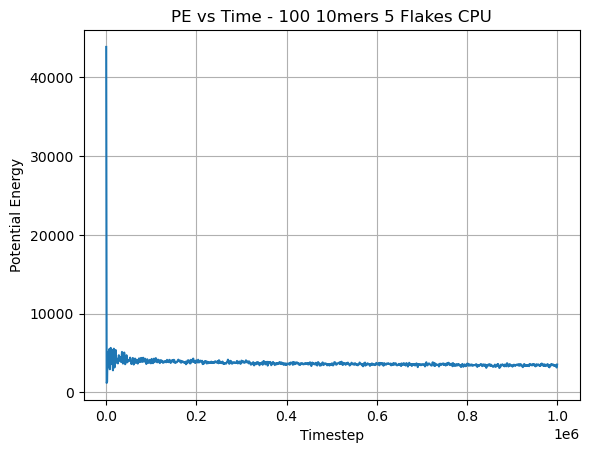

In [20]:
plt.plot(timesteps, PE)
plt.xlabel("Timestep")
plt.ylabel("Potential Energy")
plt.title("PE vs Time - 100 10mers 5 Flakes CPU")
plt.grid(True)
plt.show()

In [15]:
print(N)

[100. 100.]


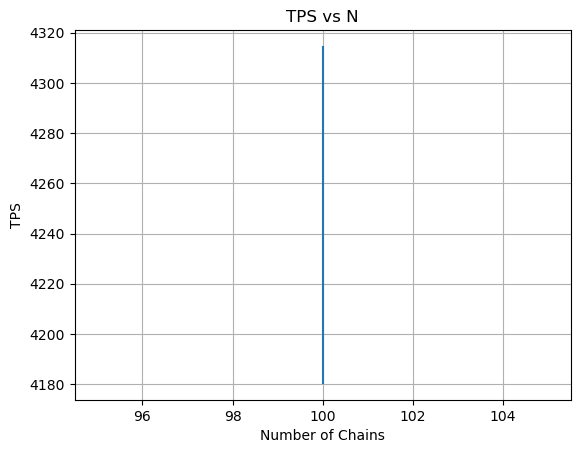

In [16]:
plt.plot(N, tps)
plt.xlabel("Number of Chains")
plt.ylabel("TPS")
plt.title("TPS vs N")
plt.grid(True)
plt.show()